In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

name = "primary_total_market"
BASE = Path("../../data")
print(BASE)
price_file = BASE / f"{name}_prices_monthly.csv"
returns_file = BASE / f"{name}_returns_monthly.csv"

..\..\data


In [2]:
rets = pd.read_csv(returns_file, index_col=0, parse_dates=True)
act_price = pd.read_csv(price_file, index_col=0, parse_dates=True)

In [3]:
vol = rets.std()                      # per-period volatility
inv_vol = 1 / vol
rp_weights = inv_vol / inv_vol.sum()  # normalize

rp_weights_pct = rp_weights * 100
print(rp_weights_pct)


BND    34.182797
GLD    10.227233
TIP    28.134727
TLT    11.713523
VEU     8.156786
VGT     7.584934
dtype: float64


In [8]:
# risk contribution
risk_contrib = rp_weights * vol

# convert to percentage of total portfolio risk
risk_contrib_pct = (risk_contrib / risk_contrib.sum()) * 100

In [4]:
rp_ret = (rets * rp_weights).sum(axis=1)
rp_growth = (1 + rp_ret).cumprod()
rp_perf_pct = (rp_growth - 1) * 100


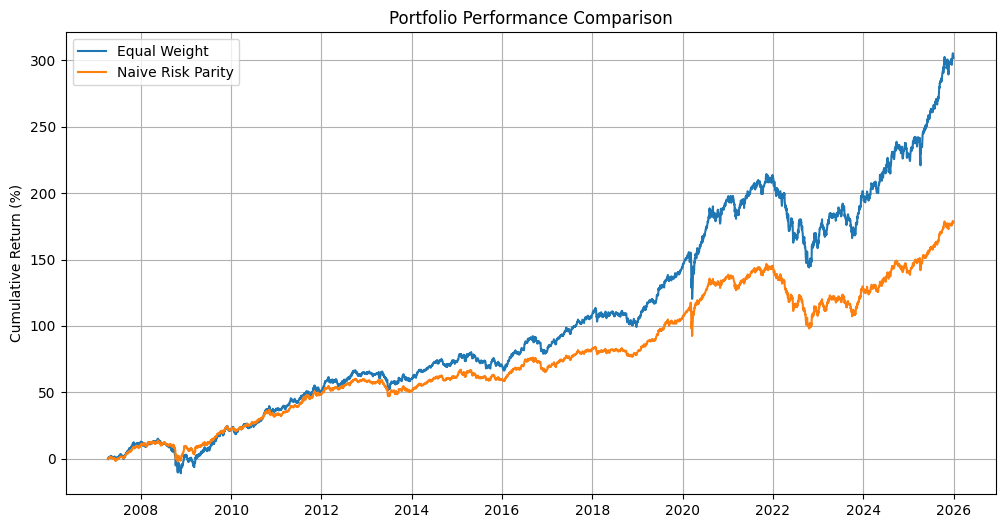

In [5]:
eq_ret = rets.mean(axis=1)
eq_growth = (1 + eq_ret).cumprod()
eq_perf_pct = (eq_growth - 1) * 100

plt.figure(figsize=(12,6))
plt.plot(eq_perf_pct, label="Equal Weight")
plt.plot(rp_perf_pct, label="Naive Risk Parity")
plt.legend()
plt.title("Portfolio Performance Comparison")
plt.ylabel("Cumulative Return (%)")
plt.grid(True)
plt.show()


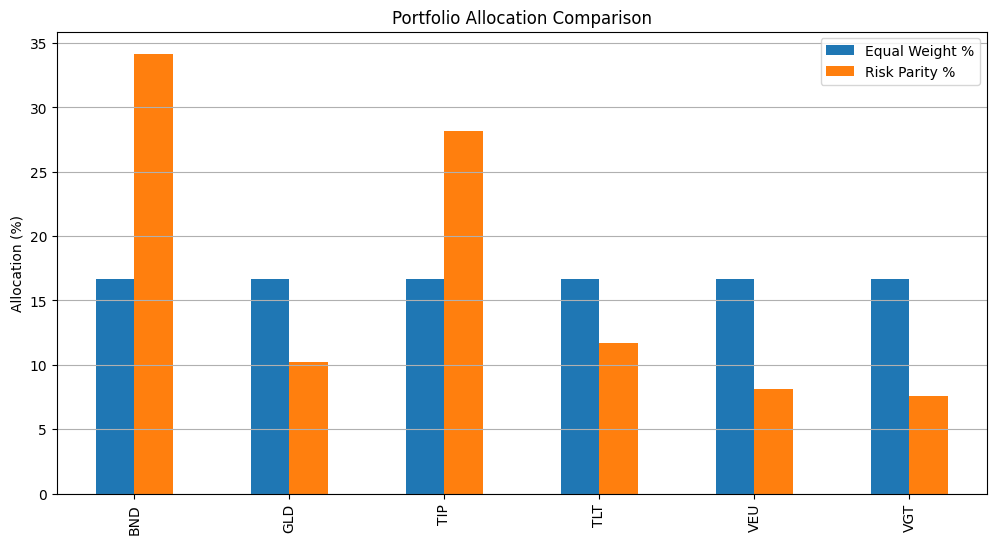

In [6]:
eq_weights = pd.Series(1/len(rets.columns), index=rets.columns)*100

stats = pd.DataFrame({
    "Equal Weight %": eq_weights,
    "Risk Parity %": rp_weights_pct
})

stats.plot(kind="bar", figsize=(12,6))
plt.ylabel("Allocation (%)")
plt.title("Portfolio Allocation Comparison")
plt.grid(axis="y")
plt.show()


In [7]:
risk_contrib = rp_weights * vol
print(risk_contrib / risk_contrib.sum())


BND    0.166667
GLD    0.166667
TIP    0.166667
TLT    0.166667
VEU    0.166667
VGT    0.166667
dtype: float64


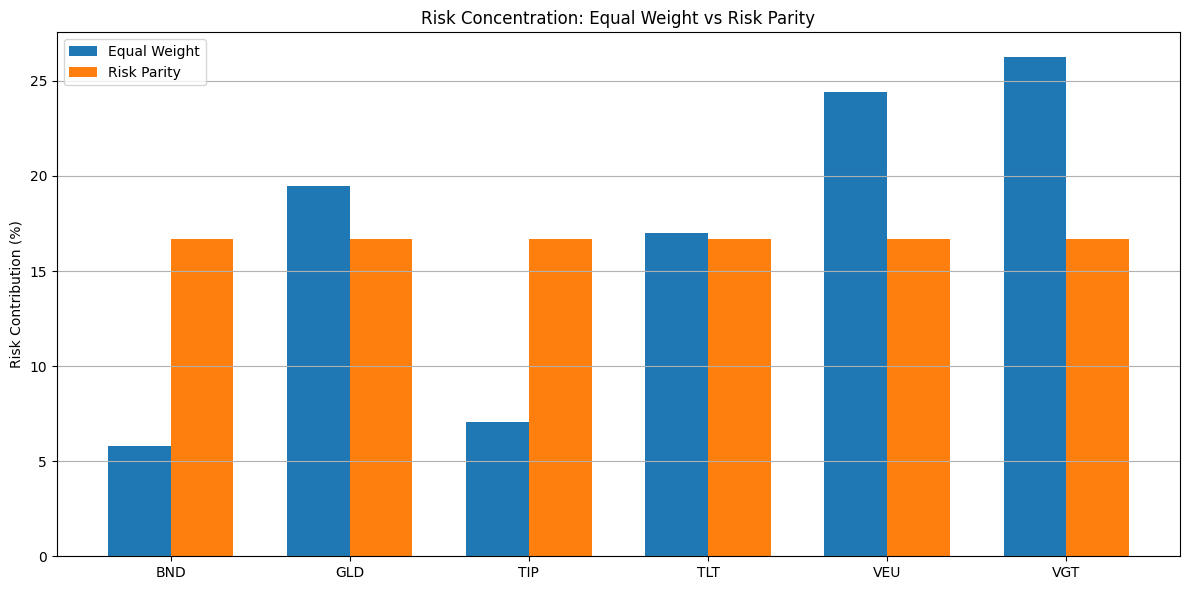

In [10]:
eq_weights = pd.Series(1/len(rets.columns), index=rets.columns)
eq_risk = eq_weights * vol
eq_risk_pct = eq_risk / eq_risk.sum() * 100

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
x = np.arange(len(vol.index))

ax.bar(x - width/2, eq_risk_pct, width, label="Equal Weight")
ax.bar(x + width/2, risk_contrib_pct, width, label="Risk Parity")

ax.set_xticks(x)
ax.set_xticklabels(vol.index)
ax.set_ylabel("Risk Contribution (%)")
ax.set_title("Risk Concentration: Equal Weight vs Risk Parity")
ax.legend()
ax.grid(axis="y")

plt.tight_layout()
plt.show()
